Fairly simple image classifier for classifying tom and jerry. Uses a pretrained resnet34 model. 
Built using fastai and pytorch.

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!pip install fastai

  Using cached https://files.pythonhosted.org/packages/50/6d/9d0d6e17a78b0598d5e8c49a0d03ffc7ff265ae62eca3e2345fab14edb9b/fastai-0.7.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ff/fa/64acc09fc845a6b2dc0724d6f3f81e829b778ed5e9a7559567b4f19a3f4b/widgetsnbextension-3.2.1-py2.py3-none-any.whl
    27% |████████▉                       | 137.5MB 46.2MB/s eta 0:00:08

    100% |████████████████████████████████| 496.4MB 25kB/s 
  Using cached https://files.pythonhosted.org/packages/3a/68/cf39dfde4e9fd886703621e3393cd8103cb48d5ecc95b8f048ec148e53a6/plotnine-0.3.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 1.5MB 22.1MB/s 
  Using cached https://files.pythonhosted.org/packages/c5/9e/42d7bcddb09a3ff52d0c60c810ba5d0fded28abbe320c85bbf7368192956/sklearn_pandas-1.6.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/93/24/6ab1df969db228aed36a648a8959d1027099ce45fad67532b9673d533318/tqdm-4.23.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e7/42/074192a165622e645ed4aeade63e76e56b3496a044569b3c6cae3a918352/jedi-0.12.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3d/a7/0364272be0c6561c45d67edec8a7bf0532d56b830438168f9078f7720f63/pandas-summary-0.0.41.tar.gz
  Using cached https://files.pythonhosted.org/packages/78/90/474d5944d43001a6e72b9aaed5c3e4f77516

    100% |████████████████████████████████| 71kB 14.9MB/s 
    100% |████████████████████████████████| 112kB 14.0MB/s 
    100% |████████████████████████████████| 92kB 20.0MB/s 
    100% |████████████████████████████████| 13.7MB 2.8MB/s 
    100% |████████████████████████████████| 81kB 20.7MB/s 
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / -

 \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Running setup.py bdist_wheel for pandas-summary ... - done
  Stored in directory: /content/.cache/pip/wheels/86/a9/6b/36b727a9ec687dac08bd3d0501cddd7b1a223943513eb04a03
  Running setup.py bdist_wheel for torchtext ... - \ done
  Stored in directory: /content/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /content/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
Successfully built bcolz pandas-summary torchtext feather-format
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is 

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

`PATH` is the path to your data - if you use the recommended setup approaches from the lesson, you won't need to change this. `sz` is the size that the images will be resized to in order to ensure that the training runs quickly. We'll be talking about this parameter a lot during the course. Leave it at `224` for now.

In [0]:
PATH = "/content/"
sz=224

In [0]:
torch.cuda.is_available()

True

In [0]:
from google.colab import files
files.upload()

Saving 1asTElvkVE5AAAAAElFTkSuQmCC.jpg to 1asTElvkVE5AAAAAElFTkSuQmCC.jpg
Saving 2Q== (1).jpg to 2Q== (1).jpg
Saving 2Q==.jpg to 2Q==.jpg
Saving 4gX6gAP0f3CEWnH3cJ7kAAAAASUVORK5CYII=.jpg to 4gX6gAP0f3CEWnH3cJ7kAAAAASUVORK5CYII=.jpg
Saving 9k= (1).jpg to 9k= (1).jpg
Saving 9k= (2).jpg to 9k= (2).jpg
Saving 9k=.jpg to 9k=.jpg
Saving 31wAAAABJRU5ErkJggg==.jpg to 31wAAAABJRU5ErkJggg==.jpg
Saving B2oqPALO3+HZAAAAAElFTkSuQmCC.jpg to B2oqPALO3+HZAAAAAElFTkSuQmCC.jpg
Saving Df8LQLcTtqpBoWQAAAAASUVORK5CYII=.jpg to Df8LQLcTtqpBoWQAAAAASUVORK5CYII=.jpg
Saving images (1).jpg to images (1).jpg
Saving images (2).jpg to images (2).jpg
Saving images (3).jpg to images (3).jpg
Saving images (4).jpg to images (4).jpg
Saving images (5).jpg to images (5).jpg
Saving images (6).jpg to images (6).jpg
Saving images (7).jpg to images (7).jpg
Saving images (8).jpg to images (8).jpg
Saving images (9).jpg to images (9).jpg
Saving images (10).jpg to images (10).jpg
Saving images (11).jpg to images (11).jpg
Saving i

{'1asTElvkVE5AAAAAElFTkSuQmCC.jpg': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xf3\x00\x00\x00\xd0\x08\x03\x00\x00\x00\xe5\x10\xa7\x95\x00\x00\x01DPLTE\xff\xff\xff\x93\x9a\xa2\xcc\xcd\xcf\xfa\xb8\xaa\x00\x00\x00\x96\x9d\xa5\x92\x99\xa1\xff\xfe\xff$/5\x00\x00\x0e\x00\x00\x10\x00\x00\x0c\x95\x9d\xa4\x97\x9d\xa6\x90\x97\x9f\x00\x13\x1e\x1e*0\x00\x17!\x14!(\x8a\x91\x99PX_\x82\x89\x91\x00\x10\x1a\xd2\xd4\xd5\x19%+\x00\x00\x08qy\x80fmt\xff\xea\x97\x00\x0f\x1b\xf4\xf5\xf5HPWz\x81\x89;DJmu|\xe4\xe5\xe6`gn\x00\x12\x1f\x00\t\x14\xc3\xc6\xc8\xe9\xeb\xec}\x81\x84:CI2;Aaip\x00\x1a#\x0c\x1d%U\\c\x9d\xa1\xa2\xab\xae\xaf\xb6\xbb\xbd\x85\x8b\x8dq`[*3;LT\\\xb0\xb4\xb6\x95\x98\x9aw{}&-6\x00\x08\x19\r\x1d(\xff\xf2\x9beoy1<E\x10"&\x00\x14\x18\x00\x1c \x00\x0e\x10m~\x82\xd4\xa0\x98\xed\xb2\xa4\x0c&1\x00\x18*\xc6\xbd\x7f\xde\xd1\x89\x00\x16/\x8alj\x81~X\xa2{x2=3\xbf\x90\x88\x13,0I>B\x94\x91c\xb3\xaar>HVSUIjoRE?@WOO\xb6\x8d\x86\xb6\xbev\xb9\xb0tg\xbaO33<\x05\x1a74Q9\x80gaDnCO\x89D\x12\x18+\\\xa0K/GL\x0

In [0]:
!mkdir tom
!mv /content/*.jpg /content/tom/

In [0]:
!mkdir jerry

In [0]:
import os
os.chdir('jerry')


In [0]:
files.upload()

Saving 2Q== (1).jpg to 2Q== (1).jpg
Saving 2Q== (2).jpg to 2Q== (2).jpg
Saving 2Q== (3).jpg to 2Q== (3).jpg
Saving 2Q==.jpg to 2Q==.jpg
Saving 4Qrb6EYKAAAAAElFTkSuQmCC.jpg to 4Qrb6EYKAAAAAElFTkSuQmCC.jpg
Saving 9k=.jpg to 9k=.jpg
Saving 94WvvY0EM2jnGxajlF2hECA3uBcHhb4eehpg76PEh8Lwv6N1LfWSjTKNBLFDDym+S3SUucYlLXOISl7jEJS5xiUt04f8Bf6LB+SR6BzUAAAAASUVORK5CYII=.jpg to 94WvvY0EM2jnGxajlF2hECA3uBcHhb4eehpg76PEh8Lwv6N1LfWSjTKNBLFDDym+S3SUucYlLXOISl7jEJS5xiUt04f8Bf6LB+SR6BzUAAAAASUVORK5CYII=.jpg
Saving A+5U1vRL9hJnAAAAABJRU5ErkJggg==.jpg to A+5U1vRL9hJnAAAAABJRU5ErkJggg==.jpg
Saving Abp+crGSK21aAAAAAElFTkSuQmCC.jpg to Abp+crGSK21aAAAAAElFTkSuQmCC.jpg
Saving E3518Su+4iu+4iu+4iu+4iv+Fv4HeO4u+dagX40AAAAASUVORK5CYII=.jpg to E3518Su+4iu+4iu+4iu+4iv+Fv4HeO4u+dagX40AAAAASUVORK5CYII=.jpg
Saving EyYRzK8x5AAAAAElFTkSuQmCC.jpg to EyYRzK8x5AAAAAElFTkSuQmCC.jpg
Saving images (1).jpg to images (1).jpg
Saving images (2).jpg to images (2).jpg
Saving images (3).jpg to images (3).jpg
Saving images (4).jpg to ima

{'2Q== (1).jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x12\x12\x15\x12\x12\x12\x15\x16\x15\x17\x17\x17\x1a\x18\x17\x15\x15\x17\x15\x19\x17\x18\x17\x18\x16\x17\x18\x16\x15\x17\x18\x1d( \x18\x1a%\x1d\x18\x17"1"%)+0..\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1b\x10\x10\x1b-% %----+-------/---+---+-----------------------------\xff\xc0\x00\x11\x08\x01\x0c\x00\xbc\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x04\x06\x02\x03\x07\x01\x08\xff\xc4\x00K\x10\x00\x01\x03\x01\x05\x04\x06\x06\x07\x04\x07\x07\x05\x00\x00\x00\x01\x00\x02\x03\x11\x04\x05\x12!1\x06AQa\x13"q\x81\x91\xa1\x072R\xb1\xc1\xd1\x14Bbr\x82\xe1\xf0#\x92\xa2\xc2$3Scs\xb2\xb3\x15\x17CT\xa3\xd2\xf1\x08dt\x83\x93\xff\xc4\x00\x1a\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x01\x02\x03\x05\x06\xff\xc4\x003\x11\x00\x02\x01\x02\x04\x02\t\x03\x04\x03\x01\x01\x

In addition, NVidia provides special accelerated functions for deep learning in a package called CuDNN. Although not strictly necessary, it will improve training performance significantly, and is included by default in all supported fastai configurations. Therefore, if the following does not return `True`, you may want to look into why.

In [0]:
!pip install pillow=='4.0.0'


    100% |████████████████████████████████| 5.6MB 7.9MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Found existing installation: Pillow 5.1.0
    Uninstalling Pillow-5.1.0:
      Successfully uninstalled Pillow-5.1.0


In [0]:
files = os.listdir(f'{PATH}tom')[:3]
files

['9k=.jpg', 'images (13).jpg', 'images (3).jpg']

(252, 174, 3)

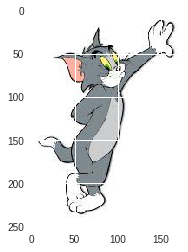

In [0]:
img = plt.imread(f'{PATH}tom/{files[0]}')
plt.imshow(img)
img.shape

In [0]:
os.chdir('/content/')
!mkdir train
!mv jerry train/
!mv tom train/

datalab  train


In [0]:
# !mkdir valid/tom/
!mv train/tom/1asTElvkVE5AAAAAElFTkSuQmCC.jpg valid/tom/

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

`PATH` is the path to your data - if you use the recommended setup approaches from the lesson, you won't need to change this. `sz` is the size that the images will be resized to in order to ensure that the training runs quickly. We'll be talking about this parameter a lot during the course. Leave it at `224` for now.

In [0]:
PATH = "/content/"
sz=224

It's important that you have a working NVidia GPU set up. The programming framework used to behind the scenes to work with NVidia GPUs is called CUDA. Therefore, you need to ensure the following line returns `True` before you proceed. If you have problems with this, please check the FAQ and ask for help on [the forums](http://forums.fast.ai).

In [0]:
from google.colab import files
files.upload()

Saving 1asTElvkVE5AAAAAElFTkSuQmCC.jpg to 1asTElvkVE5AAAAAElFTkSuQmCC.jpg
Saving 2Q== (1).jpg to 2Q== (1).jpg
Saving 2Q==.jpg to 2Q==.jpg
Saving 4gX6gAP0f3CEWnH3cJ7kAAAAASUVORK5CYII=.jpg to 4gX6gAP0f3CEWnH3cJ7kAAAAASUVORK5CYII=.jpg
Saving 9k= (1).jpg to 9k= (1).jpg
Saving 9k= (2).jpg to 9k= (2).jpg
Saving 9k=.jpg to 9k=.jpg
Saving 31wAAAABJRU5ErkJggg==.jpg to 31wAAAABJRU5ErkJggg==.jpg
Saving B2oqPALO3+HZAAAAAElFTkSuQmCC.jpg to B2oqPALO3+HZAAAAAElFTkSuQmCC.jpg
Saving Df8LQLcTtqpBoWQAAAAASUVORK5CYII=.jpg to Df8LQLcTtqpBoWQAAAAASUVORK5CYII=.jpg
Saving images (1).jpg to images (1).jpg
Saving images (2).jpg to images (2).jpg
Saving images (3).jpg to images (3).jpg
Saving images (4).jpg to images (4).jpg
Saving images (5).jpg to images (5).jpg
Saving images (6).jpg to images (6).jpg
Saving images (7).jpg to images (7).jpg
Saving images (8).jpg to images (8).jpg
Saving images (9).jpg to images (9).jpg
Saving images (10).jpg to images (10).jpg
Saving images (11).jpg to images (11).jpg
Saving i

{'1asTElvkVE5AAAAAElFTkSuQmCC.jpg': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xf3\x00\x00\x00\xd0\x08\x03\x00\x00\x00\xe5\x10\xa7\x95\x00\x00\x01DPLTE\xff\xff\xff\x93\x9a\xa2\xcc\xcd\xcf\xfa\xb8\xaa\x00\x00\x00\x96\x9d\xa5\x92\x99\xa1\xff\xfe\xff$/5\x00\x00\x0e\x00\x00\x10\x00\x00\x0c\x95\x9d\xa4\x97\x9d\xa6\x90\x97\x9f\x00\x13\x1e\x1e*0\x00\x17!\x14!(\x8a\x91\x99PX_\x82\x89\x91\x00\x10\x1a\xd2\xd4\xd5\x19%+\x00\x00\x08qy\x80fmt\xff\xea\x97\x00\x0f\x1b\xf4\xf5\xf5HPWz\x81\x89;DJmu|\xe4\xe5\xe6`gn\x00\x12\x1f\x00\t\x14\xc3\xc6\xc8\xe9\xeb\xec}\x81\x84:CI2;Aaip\x00\x1a#\x0c\x1d%U\\c\x9d\xa1\xa2\xab\xae\xaf\xb6\xbb\xbd\x85\x8b\x8dq`[*3;LT\\\xb0\xb4\xb6\x95\x98\x9aw{}&-6\x00\x08\x19\r\x1d(\xff\xf2\x9beoy1<E\x10"&\x00\x14\x18\x00\x1c \x00\x0e\x10m~\x82\xd4\xa0\x98\xed\xb2\xa4\x0c&1\x00\x18*\xc6\xbd\x7f\xde\xd1\x89\x00\x16/\x8alj\x81~X\xa2{x2=3\xbf\x90\x88\x13,0I>B\x94\x91c\xb3\xaar>HVSUIjoRE?@WOO\xb6\x8d\x86\xb6\xbev\xb9\xb0tg\xbaO33<\x05\x1a74Q9\x80gaDnCO\x89D\x12\x18+\\\xa0K/GL\x0

In [0]:
!mkdir tom
!mv /content/*.jpg /content/tom/

In [0]:
!mkdir jerry

In [0]:
import os
os.chdir('jerry')


In [0]:
files.upload()

Saving 2Q== (1).jpg to 2Q== (1).jpg
Saving 2Q== (2).jpg to 2Q== (2).jpg
Saving 2Q== (3).jpg to 2Q== (3).jpg
Saving 2Q==.jpg to 2Q==.jpg
Saving 4Qrb6EYKAAAAAElFTkSuQmCC.jpg to 4Qrb6EYKAAAAAElFTkSuQmCC.jpg
Saving 9k=.jpg to 9k=.jpg
Saving 94WvvY0EM2jnGxajlF2hECA3uBcHhb4eehpg76PEh8Lwv6N1LfWSjTKNBLFDDym+S3SUucYlLXOISl7jEJS5xiUt04f8Bf6LB+SR6BzUAAAAASUVORK5CYII=.jpg to 94WvvY0EM2jnGxajlF2hECA3uBcHhb4eehpg76PEh8Lwv6N1LfWSjTKNBLFDDym+S3SUucYlLXOISl7jEJS5xiUt04f8Bf6LB+SR6BzUAAAAASUVORK5CYII=.jpg
Saving A+5U1vRL9hJnAAAAABJRU5ErkJggg==.jpg to A+5U1vRL9hJnAAAAABJRU5ErkJggg==.jpg
Saving Abp+crGSK21aAAAAAElFTkSuQmCC.jpg to Abp+crGSK21aAAAAAElFTkSuQmCC.jpg
Saving E3518Su+4iu+4iu+4iu+4iv+Fv4HeO4u+dagX40AAAAASUVORK5CYII=.jpg to E3518Su+4iu+4iu+4iu+4iv+Fv4HeO4u+dagX40AAAAASUVORK5CYII=.jpg
Saving EyYRzK8x5AAAAAElFTkSuQmCC.jpg to EyYRzK8x5AAAAAElFTkSuQmCC.jpg
Saving images (1).jpg to images (1).jpg
Saving images (2).jpg to images (2).jpg
Saving images (3).jpg to images (3).jpg
Saving images (4).jpg to ima

{'2Q== (1).jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x12\x12\x15\x12\x12\x12\x15\x16\x15\x17\x17\x17\x1a\x18\x17\x15\x15\x17\x15\x19\x17\x18\x17\x18\x16\x17\x18\x16\x15\x17\x18\x1d( \x18\x1a%\x1d\x18\x17"1"%)+0..\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1b\x10\x10\x1b-% %----+-------/---+---+-----------------------------\xff\xc0\x00\x11\x08\x01\x0c\x00\xbc\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x04\x06\x02\x03\x07\x01\x08\xff\xc4\x00K\x10\x00\x01\x03\x01\x05\x04\x06\x06\x07\x04\x07\x07\x05\x00\x00\x00\x01\x00\x02\x03\x11\x04\x05\x12!1\x06AQa\x13"q\x81\x91\xa1\x072R\xb1\xc1\xd1\x14Bbr\x82\xe1\xf0#\x92\xa2\xc2$3Scs\xb2\xb3\x15\x17CT\xa3\xd2\xf1\x08dt\x83\x93\xff\xc4\x00\x1a\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x01\x02\x03\x05\x06\xff\xc4\x003\x11\x00\x02\x01\x02\x04\x02\t\x03\x04\x03\x01\x01\x

In [0]:
!pip install pillow=='4.0.0'


    100% |████████████████████████████████| 5.6MB 7.9MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Found existing installation: Pillow 5.1.0
    Uninstalling Pillow-5.1.0:
      Successfully uninstalled Pillow-5.1.0


In [0]:
files = os.listdir(f'{PATH}tom')[:3]
files

['9k=.jpg', 'images (13).jpg', 'images (3).jpg']

(252, 174, 3)

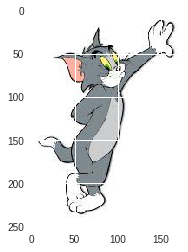

In [0]:
img = plt.imread(f'{PATH}tom/{files[0]}')
plt.imshow(img)
img.shape

In [0]:
os.chdir('/content/')
!mkdir train
!mv jerry train/
!mv tom train/

datalab  train


In [0]:
# !mkdir valid/tom/
!mv train/tom/1asTElvkVE5AAAAAElFTkSuQmCC.jpg valid/tom/

In [0]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

100%|██████████| 1/1 [00:00<00:00,  6.29it/s]


epoch      trn_loss   val_loss   accuracy   
    0      1.006567   0.679701   0.5       
    1      0.864567   0.802654   0.5       



[array([0.80265]), 0.5]

In [0]:
os.chdir('/content/valid/tom/')
from google.colab import files
files.upload()

Saving 2Q==.jpg to 2Q==.jpg
Saving Df8LQLcTtqpBoWQAAAAASUVORK5CYII=.jpg to Df8LQLcTtqpBoWQAAAAASUVORK5CYII=.jpg
Saving images (1).jpg to images (1).jpg
Saving images (2).jpg to images (2).jpg
Saving images (3).jpg to images (3).jpg
Saving images (4).jpg to images (4).jpg
Saving images.jpg to images.jpg


{'2Q==.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x12\x12\x15\x13\x12\x12\x16\x16\x12\x16\x17\x17\x15\x15\x17\x18\x16\x15\x15\x15\x15\x18\x15\x18\x16\x16\x15\x15\x15\x15\x18\x1e( \x18\x1a%\x1d\x15\x15!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1b\x10\x10\x1b+%\x1f"----+-+-------------------------------------------\xff\xc0\x00\x11\x08\x00\xd3\x00\xef\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x04\x05\x06\x07\x02\x01\x08\xff\xc4\x00J\x10\x00\x01\x03\x01\x03\x07\x07\x08\x06\t\x03\x04\x03\x00\x00\x00\x01\x00\x02\x03\x11\x04\x12!\x05\x061AQ\x91\xa1\x16RSaq\x81\xd1\x07\x13\x14"2\x92\xb1\xc1#BTbr\xf0\x08\x15$3\x82\xa2\xb2\xc2\xe1s\xc3\xf14t\x93\xb3Cc\xd2\xff\xc4\x00\x1b\x01\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x04\x03\x05\x06\x07\xff\xc4\x005\x11\x00\x02\x01\x02\x05\x03\x01\x07\x02\x05\x05\x01\x0

In [0]:
# This is the label for a val data
learn.fit(1e-2, 10)

epoch      trn_loss   val_loss   accuracy   
    0      1.583132   0.874512   0.9375    
    1      0.788489   0.719509   0.9375    
    2      0.534932   0.661046   0.875     
    3      0.397042   0.532734   0.875     
    4      0.489046   0.53636    0.875     
    5      0.567165   0.610024   0.875     
    6      0.476159   0.528605   0.875     
    7      0.40945    0.433397   0.875     
    8      0.361874   0.405414   0.875     
    9      0.323462   0.402121   0.8125    



[array([0.40212]), 0.8125]

In [0]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(16, 2)

In [0]:
log_preds[:10]

array([[ -0.10711,  -2.28697],
       [  0.     , -26.39789],
       [  0.     , -16.26747],
       [ -0.00208,  -6.17489],
       [  0.     , -22.16906],
       [  0.     , -19.76157],
       [  0.     , -61.82075],
       [ -0.72819,  -0.65929],
       [ -0.48348,  -0.95877],
       [-34.73093,   0.     ]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
from PIL import Image

In [0]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


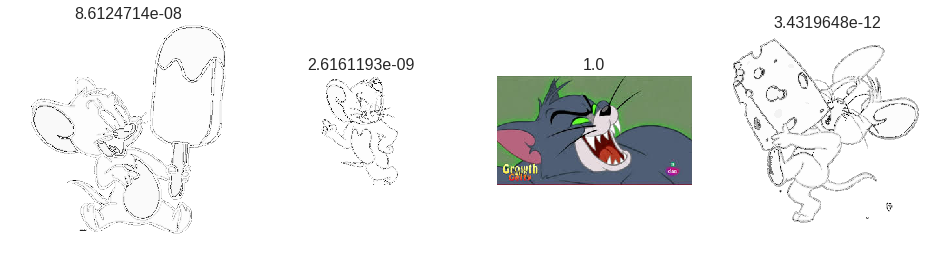

In [0]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats


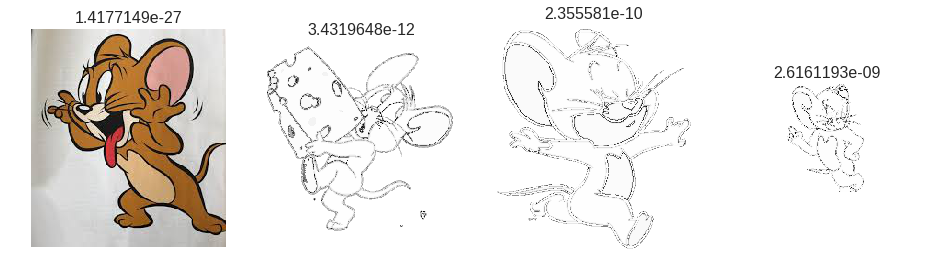

In [0]:
plot_val_with_title(most_by_correct(0, True), "Most correct tom")

Most correct dogs


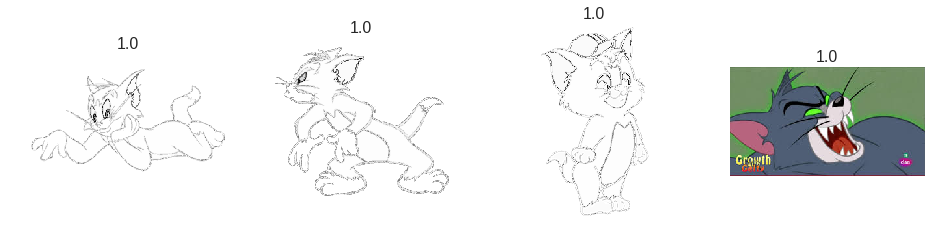

In [0]:
plot_val_with_title(most_by_correct(1, True), "Most correct jerry")

Most incorrect cats


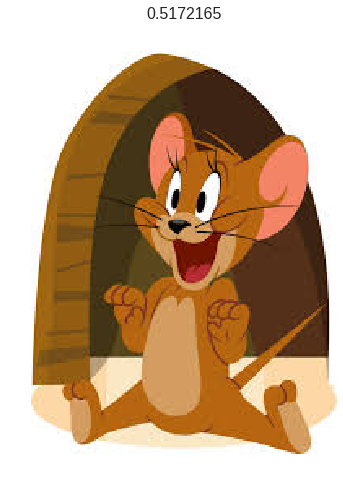

In [0]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect jerry")

Most incorrect dogs


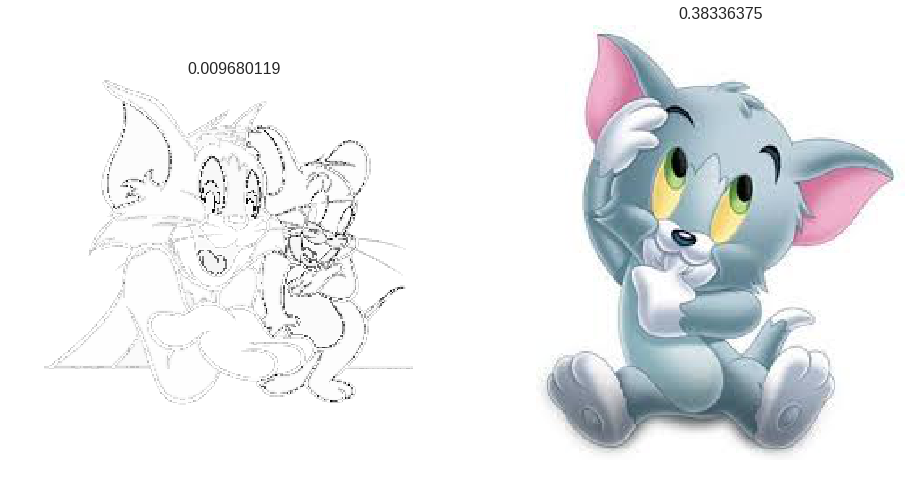

In [0]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect tom")

Most uncertain predictions


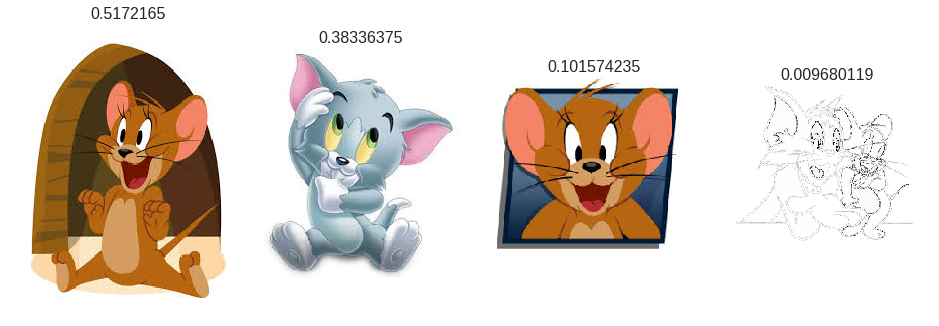

In [0]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

In [0]:
learn.lr_find()

epoch      trn_loss   val_loss   accuracy   
    0      0.05925    0.437342   0.8125    



In [0]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

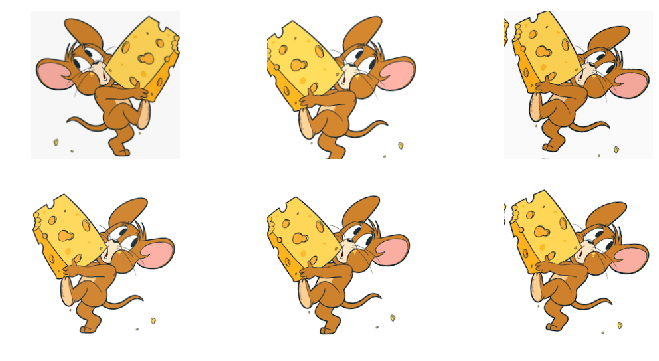

In [0]:
plots(ims, rows=2)

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


In [0]:
#@title
learn.fit(1e-2, 2, cycle_len=2, cycle_mult=3)

epoch      trn_loss   val_loss   accuracy   
    0      1.510457   0.711774   0.588235  
    1      0.964427   0.563521   0.705882  
    2      0.745497   0.425041   0.764706  
    3      0.598793   0.35301    0.823529  
    4      0.564384   0.291215   0.941176  
    5      0.515231   0.260295   0.941176  
    6      0.4428     0.240032   0.882353  
    7      0.384504   0.235537   0.882353  



[array([0.23554]), 0.8823529481887817]

In [0]:
learn.precompute=False

In [0]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.096629   0.23646    0.882353  
    1      0.151017   0.246928   0.823529  
    2      0.124508   0.247973   0.764706  



[array([0.24797]), 0.7647058963775635]